# **Diamond Price Prediction**

# **About Dataset**
This dataset contain 10 features in which 'Price(in US dollars)' is dependent feature. The goal is we have to predict the price of Diamond using different Regression Algorithms.

# **Attributes Information**

carat--> Diamond carat

cut--> Diamond cutting quality from worst to best(Fair,Good,Very Good,Premium,Ideal)

color--> diamond color from j(worst) to d(best)

clarity--> Diamond clarity from worst to best(I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)

depth--> Percentage depth(mean(x,y))

Total depth percentage. It can calculated by a simple formula. Total Depth % = z / mean(x , y) or z * 2 / (x + y).

table--> width of widest point

price--> Diamond price (target variable/dependent variable)

x--> length in mm

y--> width in mm

z--> depth in mm

# **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Reading the Data**

In [ ]:
df=pd.read_csv('diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

There are 3 variables with an ordered factor structure: cut, color, & clarity. An ordered factor arranges the categorical values in a low-to-high rank order. For example, there are 5 categories of diamond cuts with “Fair” being the lowest grade of cut to ideal being the highest grade.

There are 6 variables that are of numeric structure: carat, depth, table, x, y, z

There is 1 variable that has an integer structure: price

# **DATA PREPROCESSING**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# To show all the columns in describe function
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In this dataset it is noticed that the minimum value of x,y,z
columns are 0 it indicates that there are faulty values in data.
So we need to filter out those faulty data points

In [ ]:
df=df.drop(df[df['x']==0].index)
df=df.drop(df[df['y']==0].index)
df=df.drop(df[df['z']==0].index)
df.shape

(53920, 10)

# **Removing the Outliers**

<Axes: ylabel='x'>

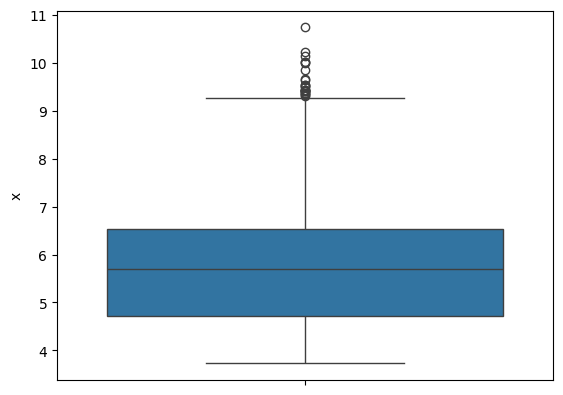

In [ ]:
sns.boxplot(y=df['x'])

# **IMPUTATION**

<Axes: ylabel='x'>

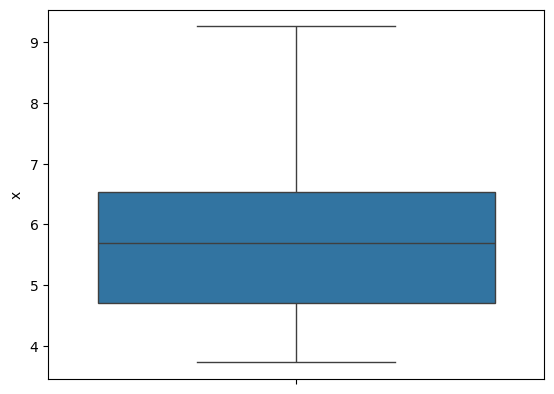

In [ ]:
Q1 = df['x'].quantile(0.25)
Q3 = df['x'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['x'] > lower_bound) & (df['x'] < upper_bound)]

sns.boxplot(y=df['x'])

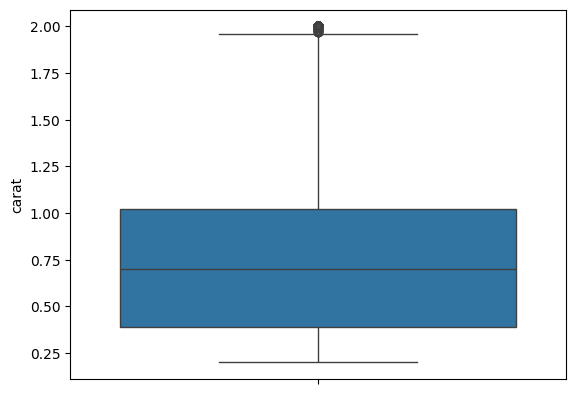

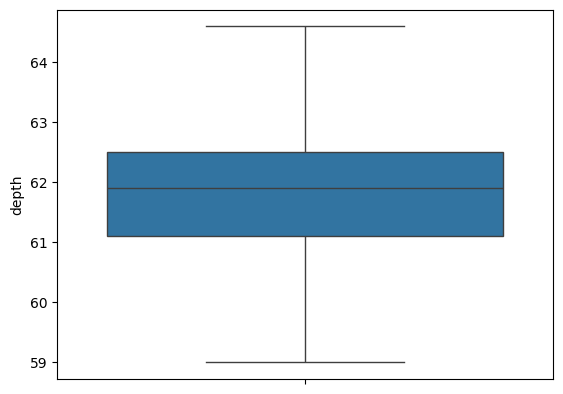

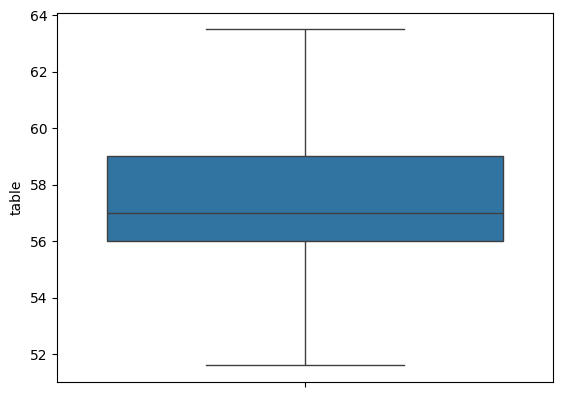

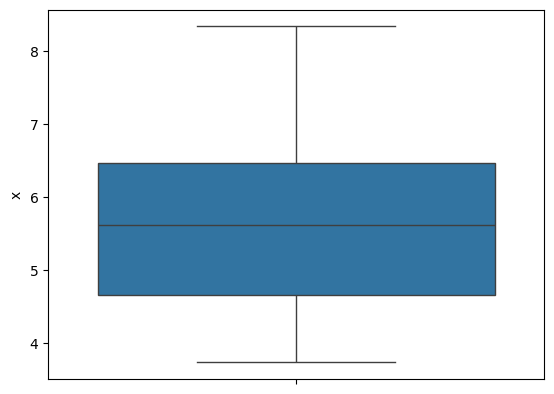

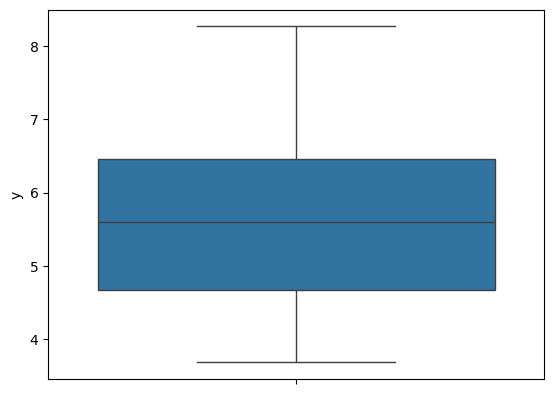

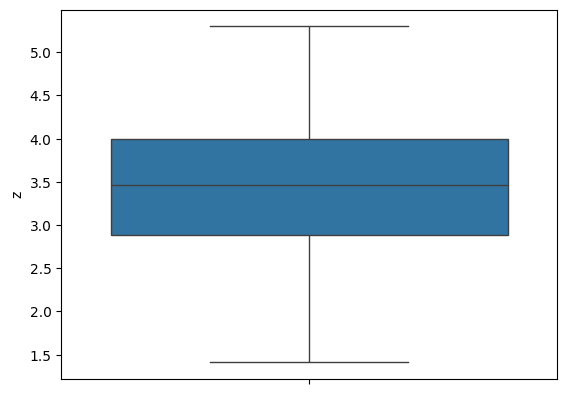

In [ ]:
cols=['carat','depth','table','x','y','z']
for i in cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    plt.figure()
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

    sns.boxplot(y=df[i])

# **Checking for duplicate value**

In [ ]:
df.duplicated().sum()

112

In [ ]:
# remove duplicate rows
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(48786, 10)

# **Data cleaning**

**Checking null values**

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There is no null values

# **Visualization**

<Axes: >

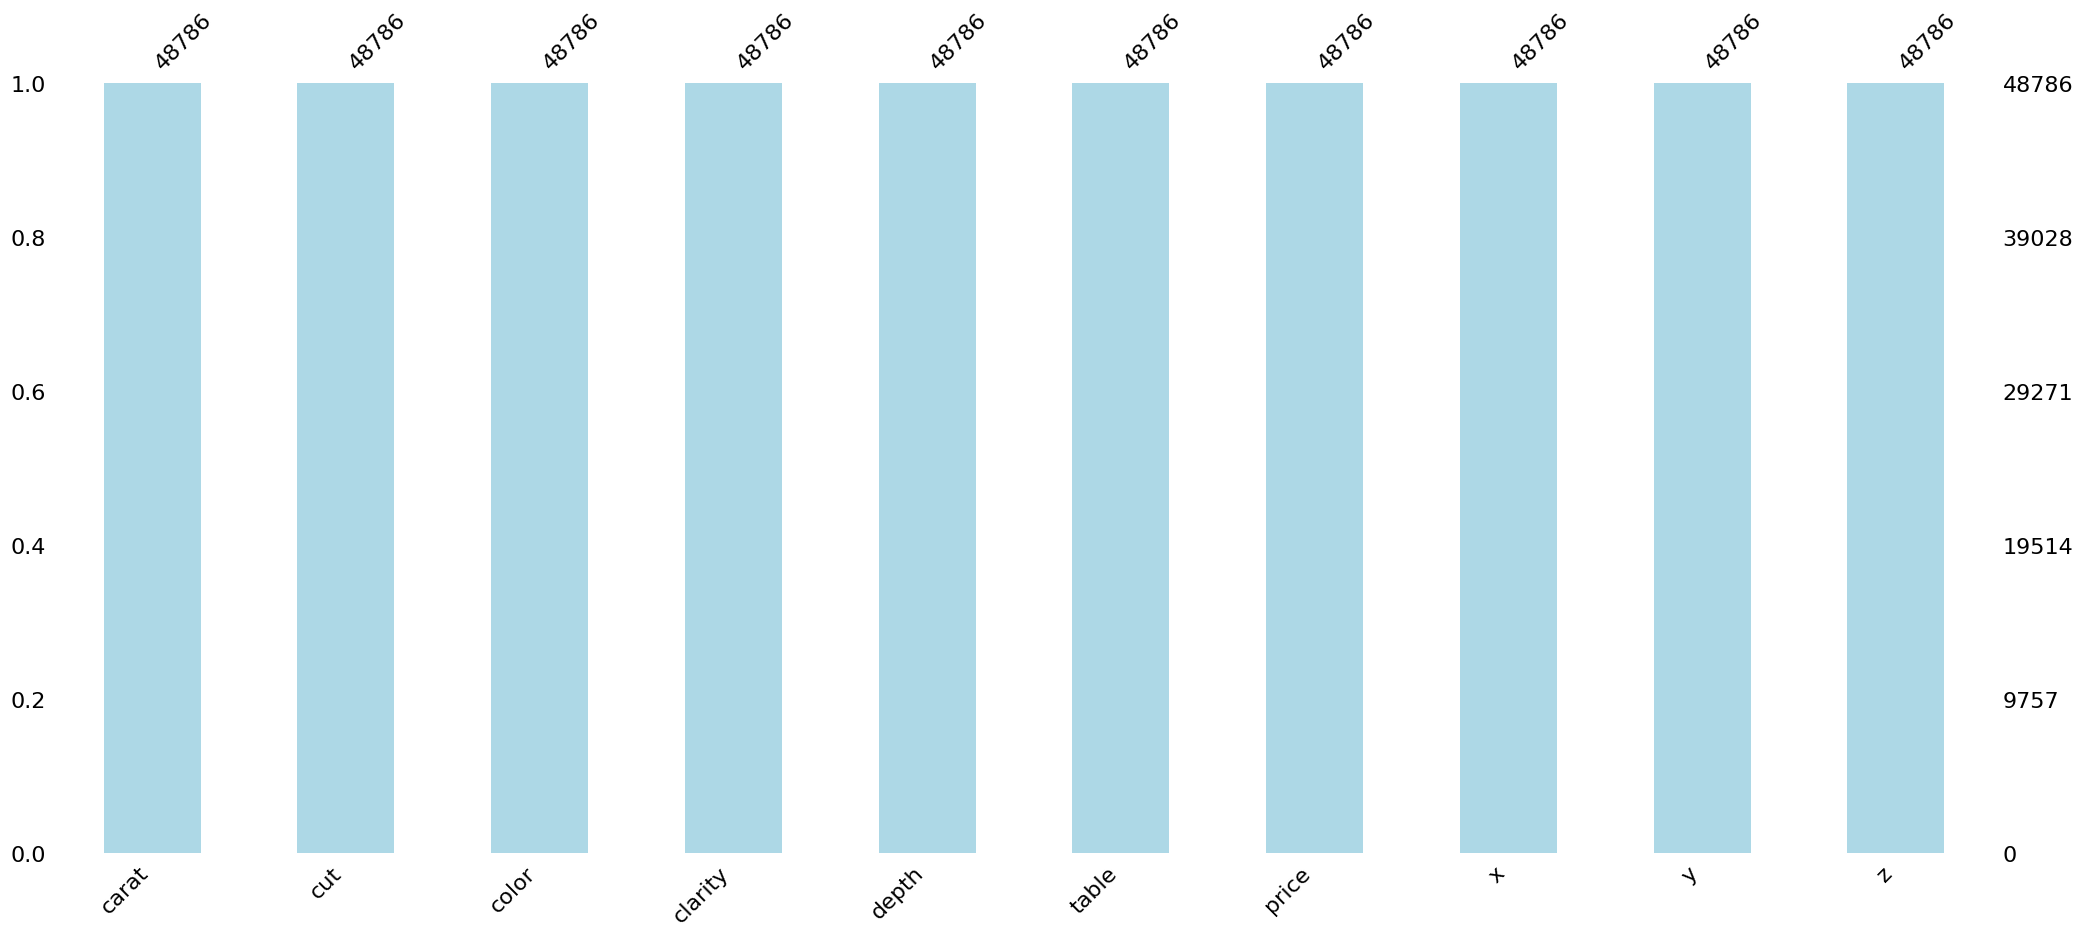

In [ ]:
import missingno as no
no.bar(df, color='lightblue')

<Axes: xlabel='carat', ylabel='price'>

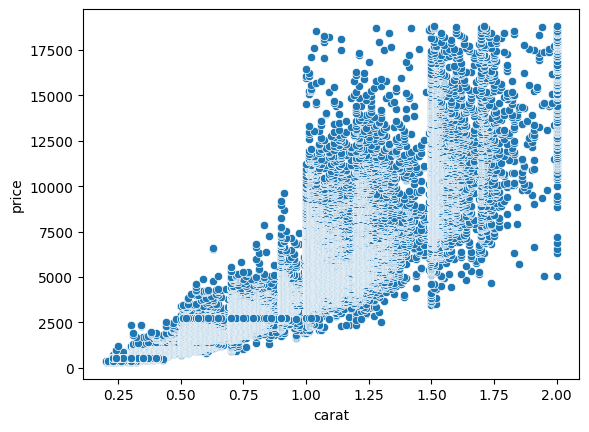

In [ ]:
sns.scatterplot(x='carat',y='price',data=df)

We can see here that as Carat increases the prices also increase.

<Axes: xlabel='cut', ylabel='price'>

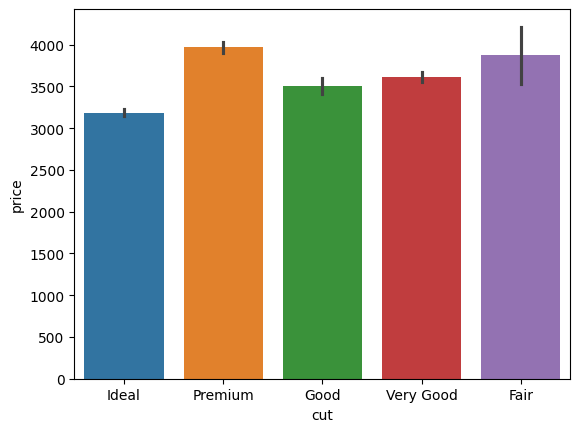

In [ ]:
sns.barplot(data=df, x="cut", y="price", hue = "cut")


Premium cut has the highest price of diamond

<Axes: xlabel='color', ylabel='price'>

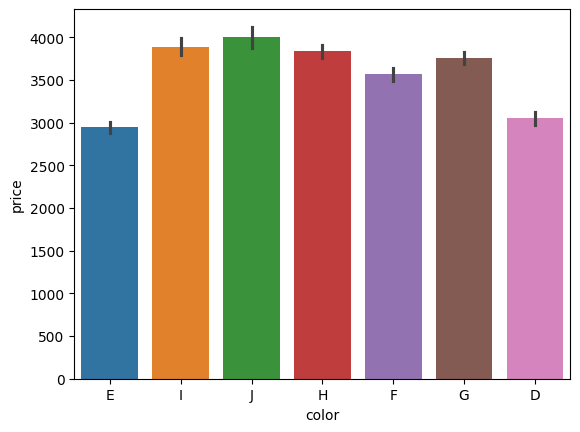

In [ ]:
sns.barplot(data=df, x="color", y="price",  hue = "color")


<Axes: xlabel='clarity', ylabel='price'>

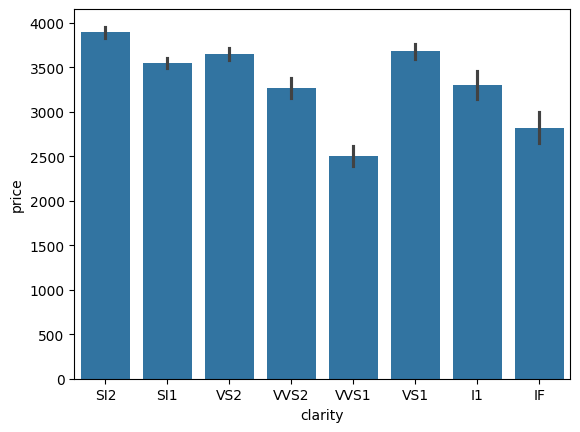

In [ ]:
sns.barplot(data=df, x="clarity", y="price")


SI2 has the highest clarity price

<Axes: xlabel='carat', ylabel='price'>

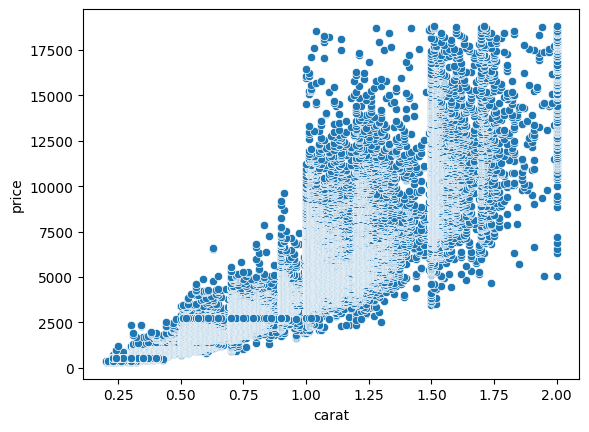

In [ ]:
# Checking the correlation between two features
sns.scatterplot(data=df, x="carat", y="price")

<Axes: xlabel='carat', ylabel='price'>

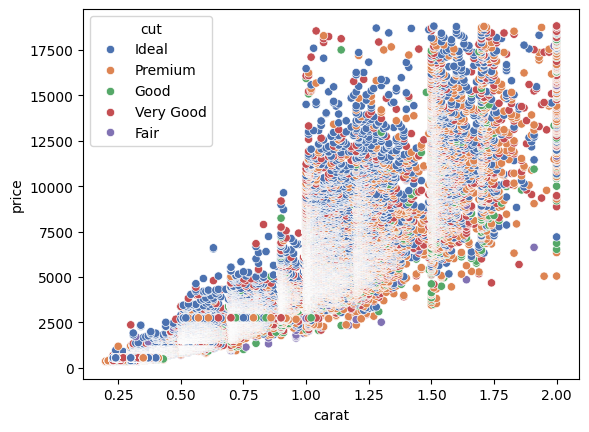

In [ ]:
sns.scatterplot(data=df, x="carat", y="price", hue="cut", palette="deep")

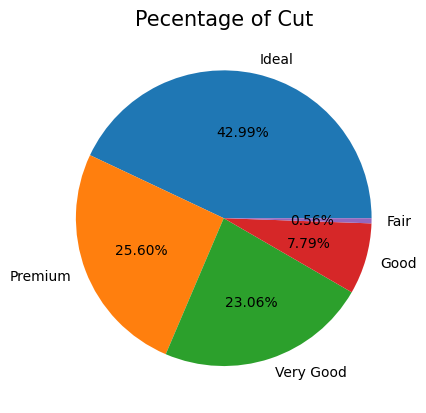

In [ ]:
df1 = df['cut'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('Pecentage of Cut', fontsize=15)
plt.show()

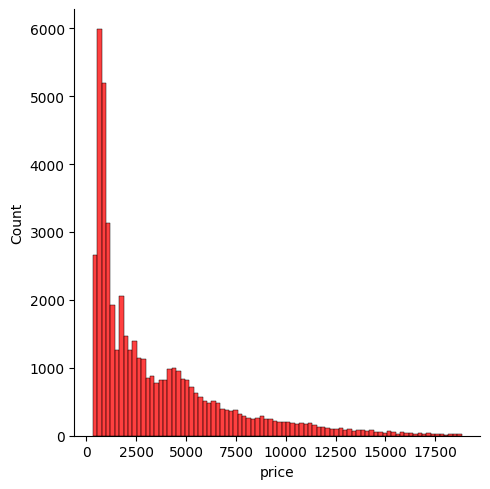

In [ ]:
sns.displot(df['price'], color='red')

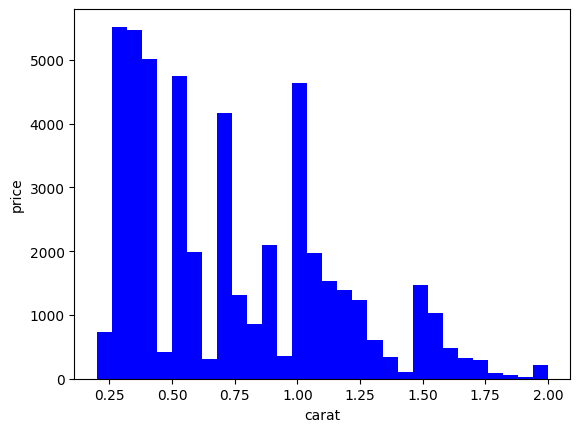

In [ ]:
plt.hist(df['carat'],bins = 30, color='b')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

# **Pairplot**

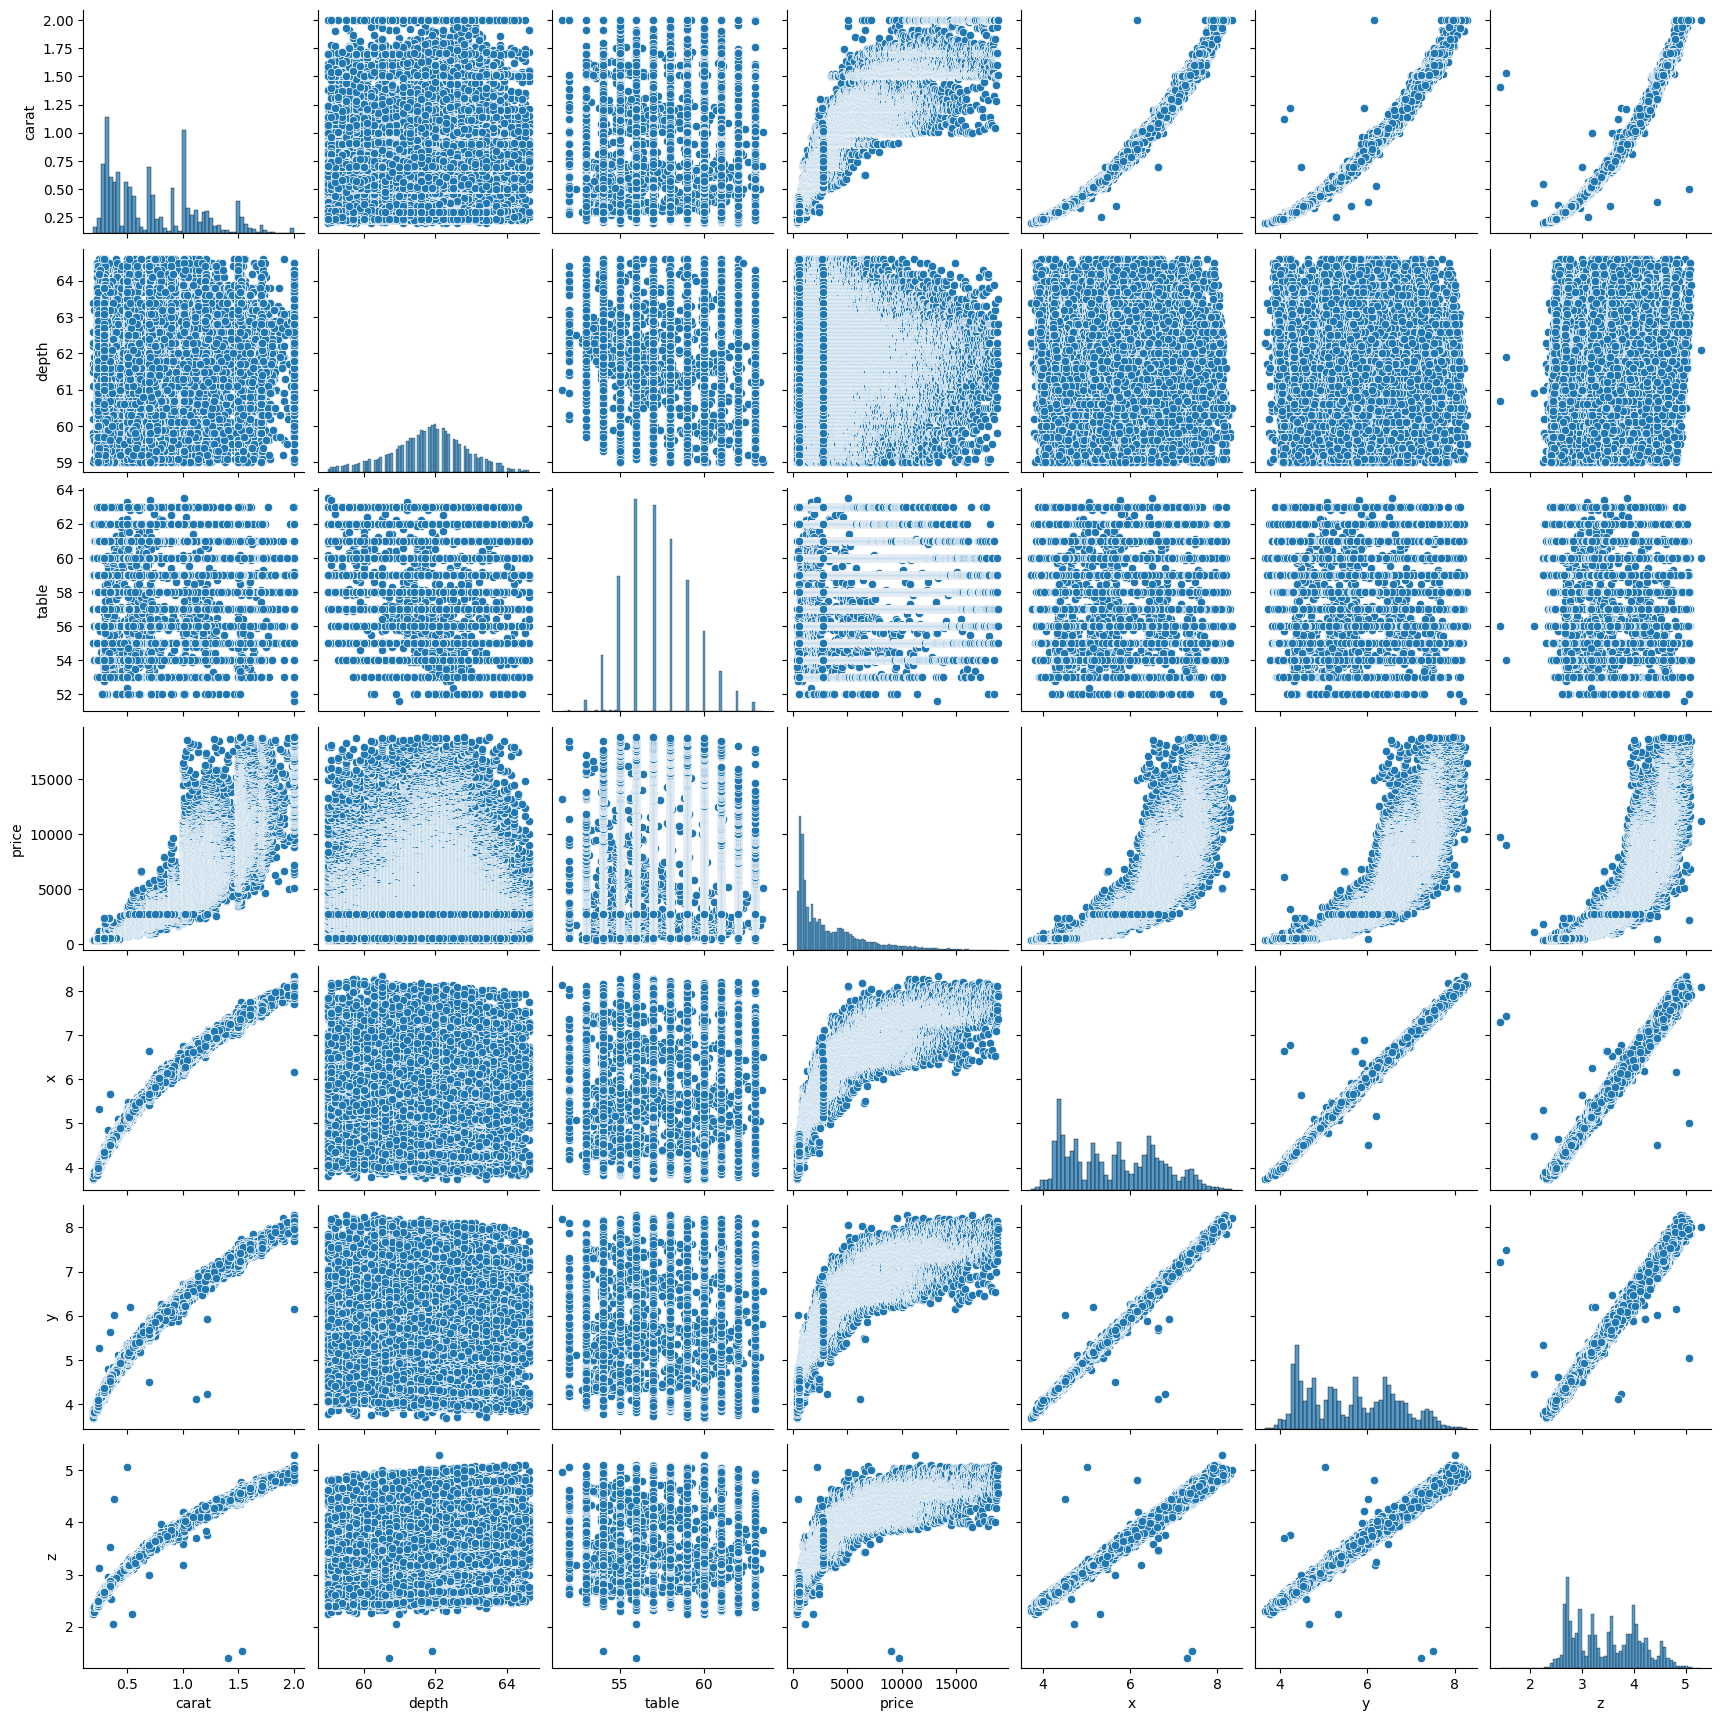

In [ ]:
sns.pairplot(df)

# **Encoding**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['cut']= label_encoder.fit_transform(df['cut'])
df['cut'].unique()

array([2, 3, 1, 4, 0])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['color']= label_encoder.fit_transform(df['color'])
df['color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['clarity']= label_encoder.fit_transform(df['clarity'])
df['clarity'].unique()

array([3, 2, 5, 7, 6, 4, 0, 1])

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


# **Finding the correlation**

In [ ]:
df['carat'].corr(df['cut'])

0.06295346842570892

In [ ]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.062953,0.234122,-0.183693,0.032282,0.180363,0.909186,0.985213,0.984539,0.984177
cut,0.062953,1.000000,0.009001,-0.007115,-0.161460,0.303308,0.048729,0.063414,0.065788,0.048706
color,0.234122,0.009001,1.000000,-0.012142,0.043846,0.018485,0.098694,0.217952,0.217947,0.221105
clarity,-0.183693,-0.007115,-0.012142,1.000000,-0.047829,-0.079481,-0.030750,-0.197347,-0.194925,-0.199774
depth,0.032282,-0.161460,0.043846,-0.047829,1.000000,-0.229202,-0.000723,-0.010268,-0.012020,0.086542
table,0.180363,0.303308,0.018485,-0.079481,-0.229202,1.000000,0.121361,0.181513,0.176332,0.157006
price,0.909186,0.048729,0.098694,-0.030750,-0.000723,0.121361,1.000000,0.875071,0.876362,0.871885
x,0.985213,0.063414,0.217952,-0.197347,-0.010268,0.181513,0.875071,1.000000,0.998643,0.994082
y,0.984539,0.065788,0.217947,-0.194925,-0.012020,0.176332,0.876362,0.998643,1.000000,0.993904
z,0.984177,0.048706,0.221105,-0.199774,0.086542,0.157006,0.871885,0.994082,0.993904,1.000000


It shows that how two variables are linearly related

# **Heatmap**

<Axes: >

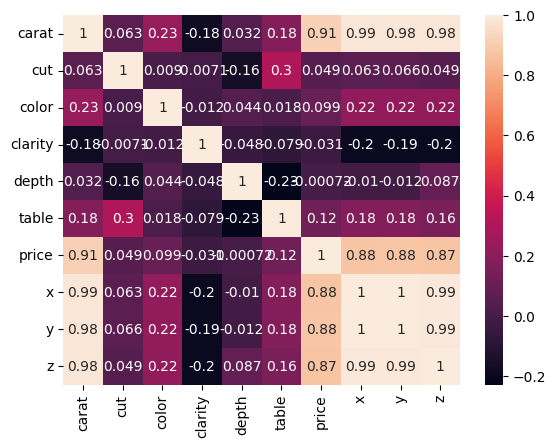

In [ ]:
corrmat=df.corr()
sns.heatmap(corrmat,annot=True)

In [ ]:
# df.drop(["y"], axis=1, inplace = True)

# **Data modeling**

In [ ]:
X= df.drop(["price"],axis =1).values
y= df["price"].values

In [ ]:
X

array([[0.23, 2.  , 1.  , ..., 3.95, 3.98, 2.43],
       [0.21, 3.  , 1.  , ..., 3.89, 3.84, 2.31],
       [0.29, 3.  , 5.  , ..., 4.2 , 4.23, 2.63],
       ...,
       [0.7 , 4.  , 0.  , ..., 5.66, 5.68, 3.56],
       [0.86, 3.  , 4.  , ..., 6.15, 6.12, 3.74],
       [0.75, 2.  , 0.  , ..., 5.83, 5.87, 3.64]])

In [ ]:
y

array([ 326,  326,  334, ..., 2757, 2757, 2757])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [ ]:
X_train

array([[0.3 , 2.  , 4.  , ..., 4.24, 4.27, 2.66],
       [0.32, 4.  , 4.  , ..., 4.37, 4.34, 2.75],
       [0.52, 2.  , 4.  , ..., 5.25, 5.23, 3.17],
       ...,
       [1.01, 1.  , 3.  , ..., 6.26, 6.34, 4.01],
       [0.26, 4.  , 2.  , ..., 4.11, 4.18, 2.52],
       [0.38, 2.  , 3.  , ..., 4.66, 4.68, 2.87]])

In [ ]:
X_test

array([[0.41, 2.  , 4.  , ..., 4.77, 4.81, 2.96],
       [0.9 , 4.  , 3.  , ..., 6.1 , 6.16, 3.84],
       [1.  , 3.  , 3.  , ..., 6.45, 6.41, 3.98],
       ...,
       [0.6 , 2.  , 3.  , ..., 5.41, 5.45, 3.32],
       [1.04, 3.  , 2.  , ..., 6.6 , 6.55, 3.96],
       [1.04, 4.  , 0.  , ..., 6.53, 6.58, 4.02]])

# **Feature Scaling To Get All Columns In Same Scale/Range**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)

In [ ]:
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-1.09690001, -0.66505646,  0.87608758, ..., -1.33831248,
        -1.32103378, -1.27725538],
       [-1.04701533,  1.45733804,  0.87608758, ..., -1.21168087,
        -1.2524724 , -1.13548203],
       [-0.54816849, -0.66505646,  0.87608758, ..., -0.35448233,
        -0.38076341, -0.47387306],
       ...,
       [ 0.67400627, -1.72625371,  0.27943198, ...,  0.62934781,
         0.7064242 ,  0.84934488],
       [-1.19666938,  1.45733804, -0.31722363, ..., -1.46494408,
        -1.40918412, -1.49779171],
       [-0.89736127, -0.66505646,  0.27943198, ..., -0.92919499,
        -0.91945997, -0.9464509 ]])

# **Training the Model**

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.coef_

array([ 5976.4122522 ,   -18.40146865,  -459.71502186,   432.9131326 ,
         -83.28384967,  -173.60940497, -2795.67677775,  1621.55602145,
       -1495.62364724])

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
y_pred

array([ 559.55382267, 3890.49307277, 5242.43665514, ..., 2059.31051669,
       5604.23460186, 6826.57920821])

# **Evaluation**

In [ ]:
from sklearn import metrics

# **Mean Square Error**

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

1389015.163749463

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1178.5648746460515

# **R2 Score**

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8807221457804921

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


# K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg_all = KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2)
reg_all.fit(X_train,y_train)
y_pred=reg_all.predict(X_test)

In [ ]:
y_pred

array([ 918.75 , 3736.   , 6417.25 , ..., 1885.125, 4179.25 , 7784.875])

# **Mean Square Error**

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

511475.9846039788

# **R2 Score**

In [ ]:
metrics.r2_score(y_test,y_pred)

0.9560784075505049

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([ 834. , 3496.8, 6006. , ..., 2097.5, 4036.6, 7992.2])

# **Mean Square Error**

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

220426.5964360836

# **R2 Score**

In [ ]:
metrics.r2_score(y_test,y_pred)

0.9810714727081642

# **Conclusion**
The Random forest Regression Model is having least Mean square error and maximum R2 score. The Random forest Regression model is performing best.